In [1]:
import cv2 as cv
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

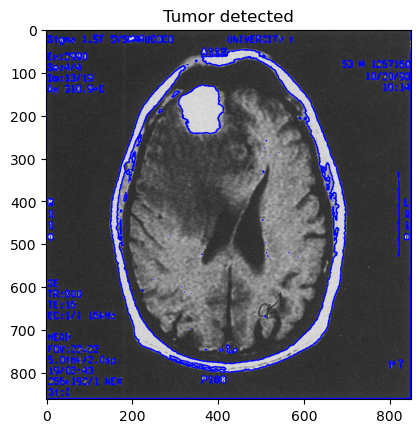

In [3]:
img = cv.imread('photos/Medical Images/Brain tumor/brain tumor 3.png')

blurred = cv.GaussianBlur(img, (1, 1), 0)
background = cv.morphologyEx(blurred, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15)))
subtracted = cv.subtract(blurred, background)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, thresh = cv.threshold(gray, 195, 255, cv.THRESH_BINARY)

threshold_area = 5000
features = []
labels = []

contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for contour in contours:
    area = cv.contourArea(contour)
    perimeter = cv.arcLength(contour, True)
    
for contour in contours:
    area = cv.contourArea(contour)
    if area == threshold_area:
        cv.drawContours(img, [contour], -1, (0, 255, 0), 2)
    else:
        cv.drawContours(img, [contour], -1, (0, 0, 255), 2)
        
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
cleaned = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

overlay = img.copy()
for contour in contours:
    area = cv.contourArea(contour)
    if area > threshold_area:
        cv.drawContours(overlay, [contour], -1, (0, 255, 0), 2)
        
alpha = 0.5
output = cv.addWeighted(overlay, alpha, img, 1 - alpha, 0)

plt.imshow(img)
plt.title('Tumor detected')
plt.show()

cv.imshow('M Img', output)
cv.imwrite('photos/Medical Images/brain tumor seg3.jpg', output)
cv.waitKey(0)
cv.destroyAllWindows()